## Contents:

1. Exploratory Data Analysis <br>
    a. Histogram of Roger Ebert's film ratings <br>
    b. Boxplot of categorical features vs. Roger Ebert's film ratings <br>
    c. Pairplot of Ebert's ratings vs. numerical features <br>
    d. Condense Genre options by mapping Genre column
2. Feature Engineering


In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Exploratory Data Analysis

In [2]:
# Accessing cleaned df
df = pd.read_pickle('./data/cleaned_df.pickle')
df.sample(5)

,TITLE,YEAR,EBERT_RATING,MPAA,RUNTIME,GENRE,SUB_GENRE,MOVIELENS_RATING,IMDB_RATING,BUDGET,OPENING_GROSS,DOMESTIC_GROSS,WORLDWIDE_GROSS
1996,Platoon,1986,4.0,R,120,War,Drama,3.919977,8.1,6000000,241080,138530565,138545632
2054,Fright Night,1985,3.0,PG-13,106,Thriller,Horror,3.327978,7.1,9000000,6118543,24922237,24922237
40,Total Recall,2012,3.0,PG-13,121,Thriller,Science Fiction,3.175272,6.3,125000000,25577758,58877969,198467168
143,Bad Teacher,2011,2.0,R,92,Comedy,N,2.936063,5.6,20000000,31603106,100292856,216197492
1609,Bullets Over Broadway,1994,3.5,R,98,Thriller,Comedy,3.700734,7.4,20000000,86072,13383747,13383747


### a. Histogram of Roger Ebert's Film Ratings
I want to see how his star scores are distributed

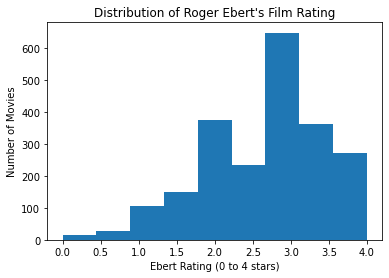

In [3]:
plt.hist(df.EBERT_RATING, bins=9)
plt.title("Distribution of Roger Ebert's Film Rating")
plt.xlabel('Ebert Rating (0 to 4 stars)')
plt.ylabel('Number of Movies')
plt.savefig('./image/Distribution of Rating.png')

### b. Boxplot of categorical features vs. Ebert Rating

There are some categorical features. I want to explore their relationship with EBERT RATING first

In [4]:
df.GENRE.value_counts().sort_values(ascending=False)

Thriller           674
Romance            422
Science Fiction    221
Drama              179
Family             127
Comedy             123
Indie               94
History             39
Sports Film         39
Music               34
Horror              33
Foreign             32
War                 29
Western             25
Musical             22
Crime               19
Fantasy             17
Documentary         14
Mystery             12
Sport               11
Adventure            7
Holiday              6
Road Movie           3
Animation            3
Erotic               2
Action               2
Suspense             1
Film Noir            1
Name: GENRE, dtype: int64

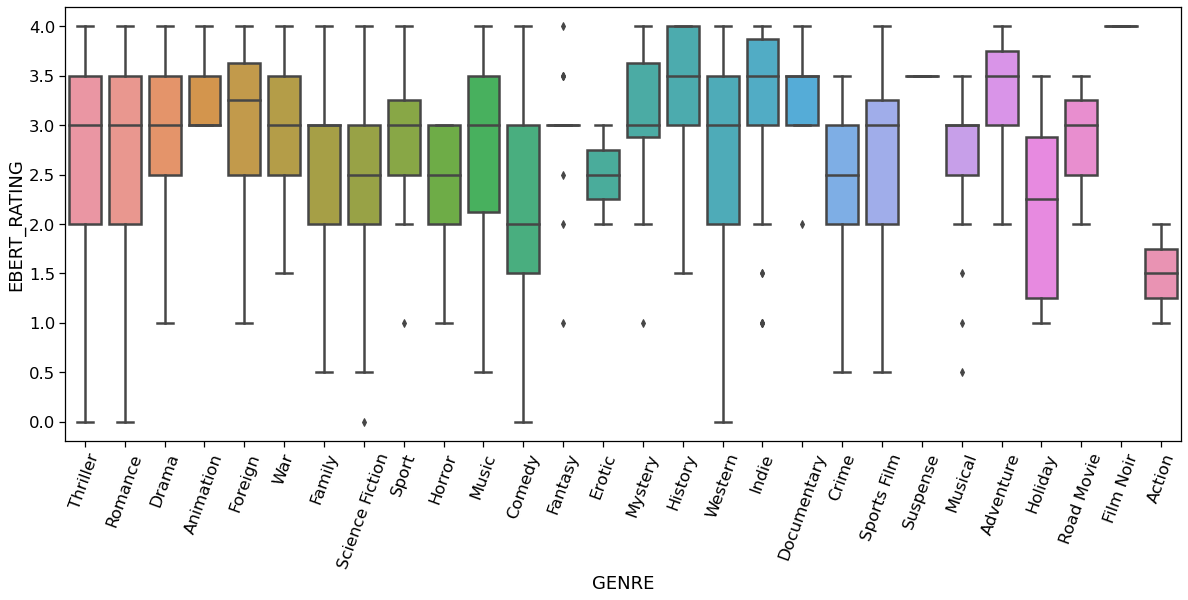

In [5]:
plt.figure(figsize=(20,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(x="GENRE", y="EBERT_RATING", data=df)
plt.xticks(rotation=70);

In [6]:
df.SUB_GENRE.value_counts().sort_values(ascending=False)

Drama              502
Comedy             332
N                  179
Science Fiction    139
Romance            119
Fantasy            114
Family              86
Foreign             85
Indie               80
Crime               79
Mystery             79
Suspense            71
Action              69
Horror              68
Adventure           60
Music               30
History             29
Animation           19
Thriller            13
Musical              9
Documentary          8
Erotic               5
Holiday              4
Disaster             4
Sports Film          3
Sport                2
Film Noir            1
Neo-noir             1
Road Movie           1
Name: SUB_GENRE, dtype: int64

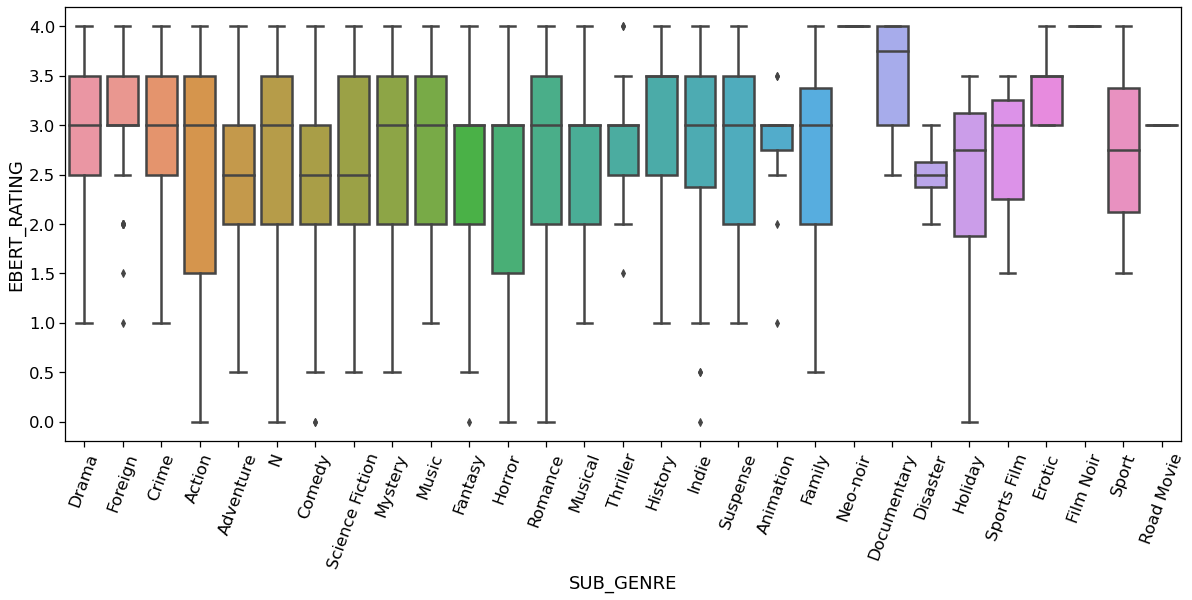

In [7]:
plt.figure(figsize=(20,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(x="SUB_GENRE", y="EBERT_RATING", data=df)
plt.xticks(rotation=70);

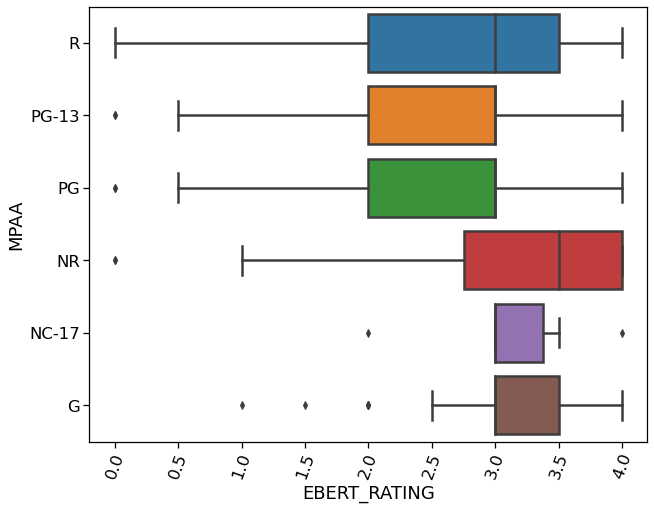

In [8]:
plt.figure(figsize=(10,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(x="EBERT_RATING", y="MPAA", data=df)
plt.xticks(rotation=70);

### c. Pairplot of Ebert's rating vs. numerical features

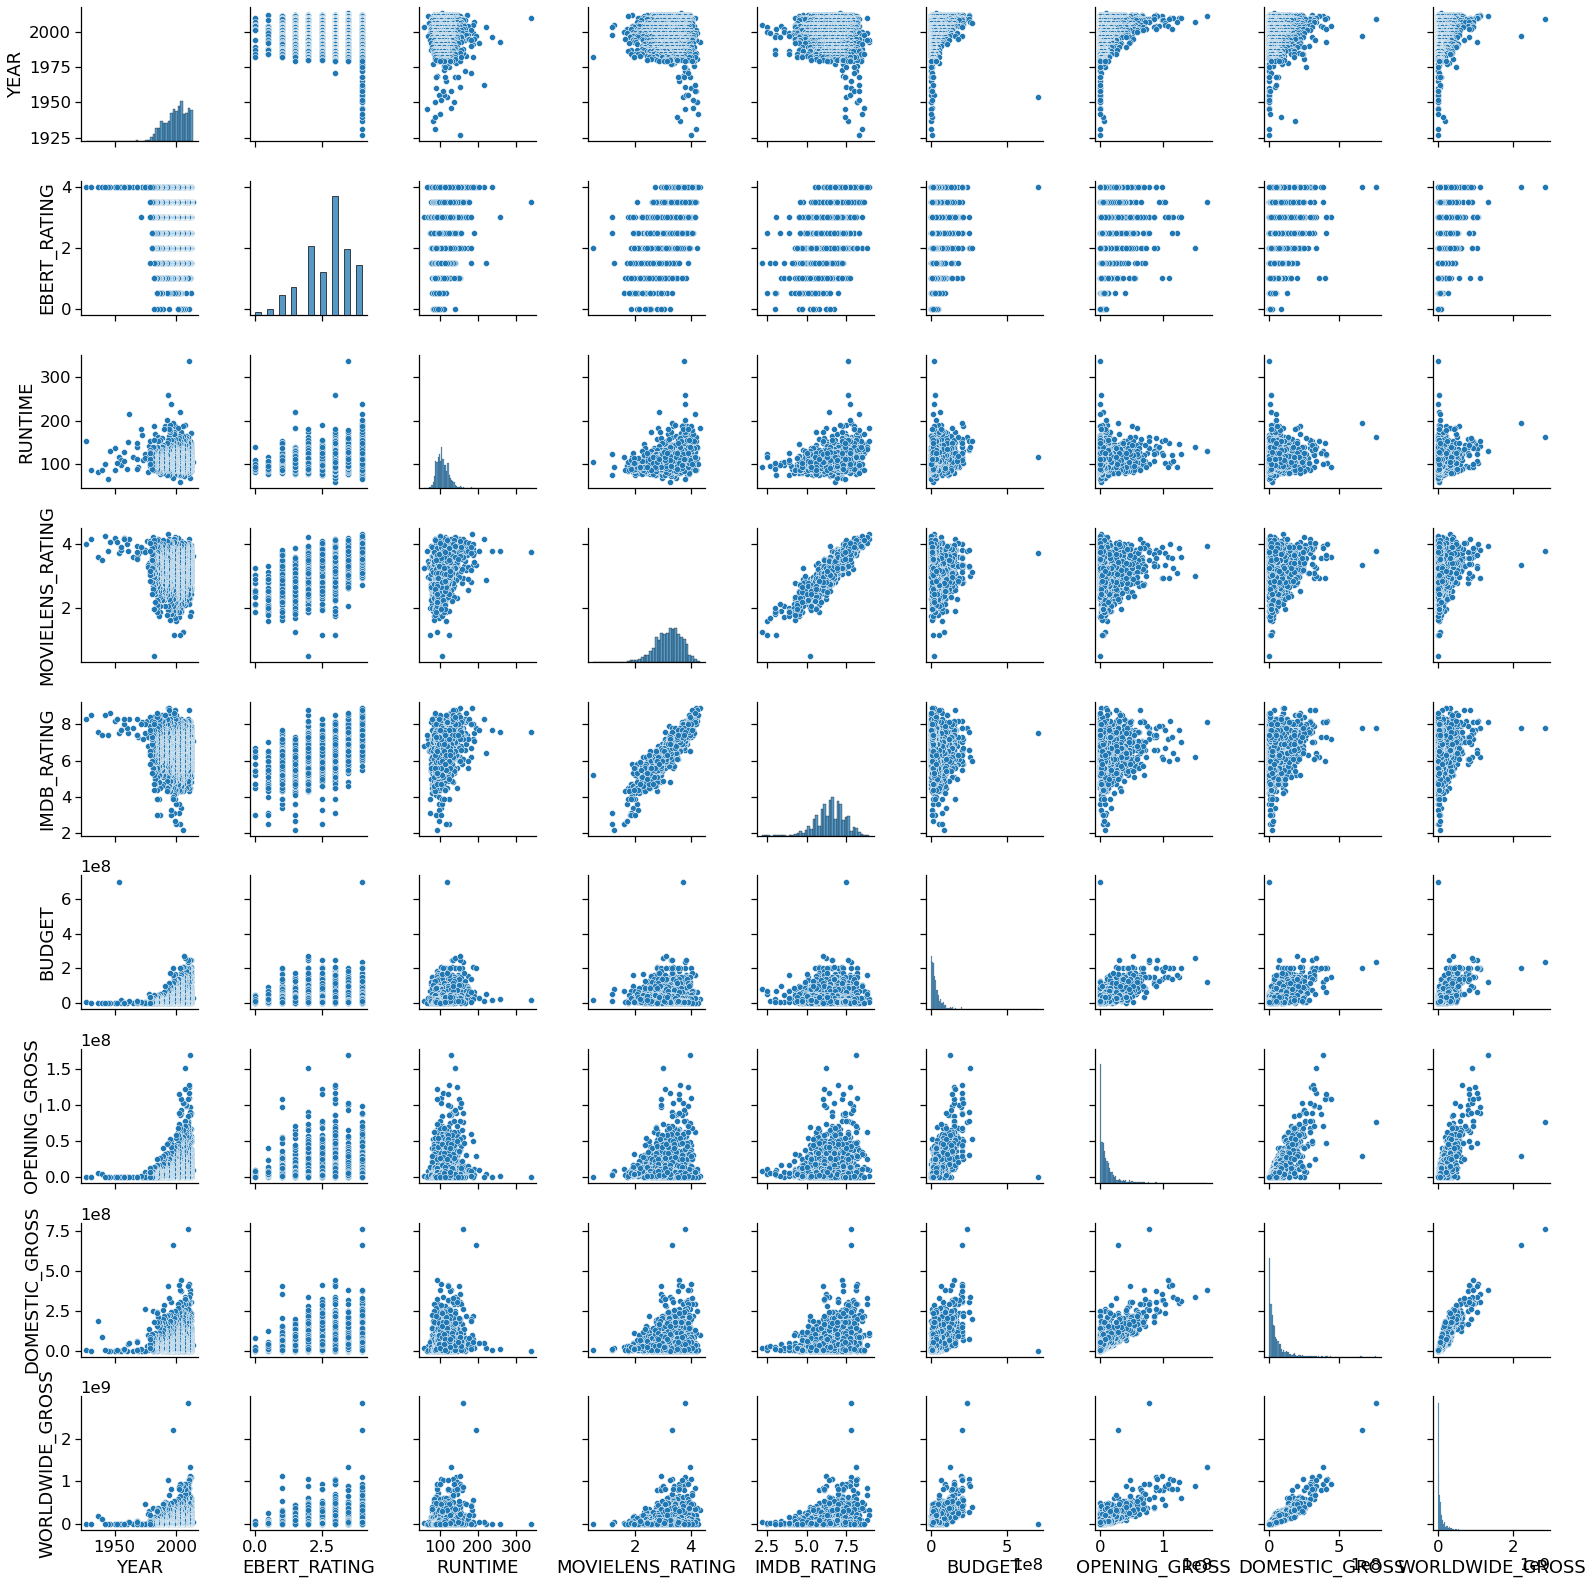

In [9]:
sns.pairplot(df);

### d. Condense Genre options by mapping Genre column

In [10]:
# dict for mapping
genre_dict= {'Thriller': 'Thriller',
             'Romance': 'Romance',
             'Science Fiction': 'Science Fiction',
             'Drama':'Drama',
             'Family': 'Family',
             'Comedy': 'Comedy',
             'Indie': 'Indie',
             'History': 'History-Documentary-War',
             'Sports Film': 'Sport',
             'Music': 'Musical',
             'Horror': 'Crime-Horror',
             'Foreign': 'Foreign',
             'War': 'History-Documentary-War',
             'Western':'Western',
             'Musical':'Musical',
             'Crime':'Crime-Horror',
             'Fantasy':'Fantasy-Mystery',
             'Documentary':'History-Documentary-War',
             'Mystery':'Fantasy-Mystery',
             'Sport':'Sport',
             'Adventure':'Adventure-Animation',
             'Holiday': 'Other',
             'Animation':'Adventure-Animation',
             'Road Movie': 'Other',
             'Action': 'Western',
             'Erotic': 'Other',
             'Suspense': 'Other',
             'Film Noir': 'Other' }

df['GENRE'] = df.GENRE.map(genre_dict)

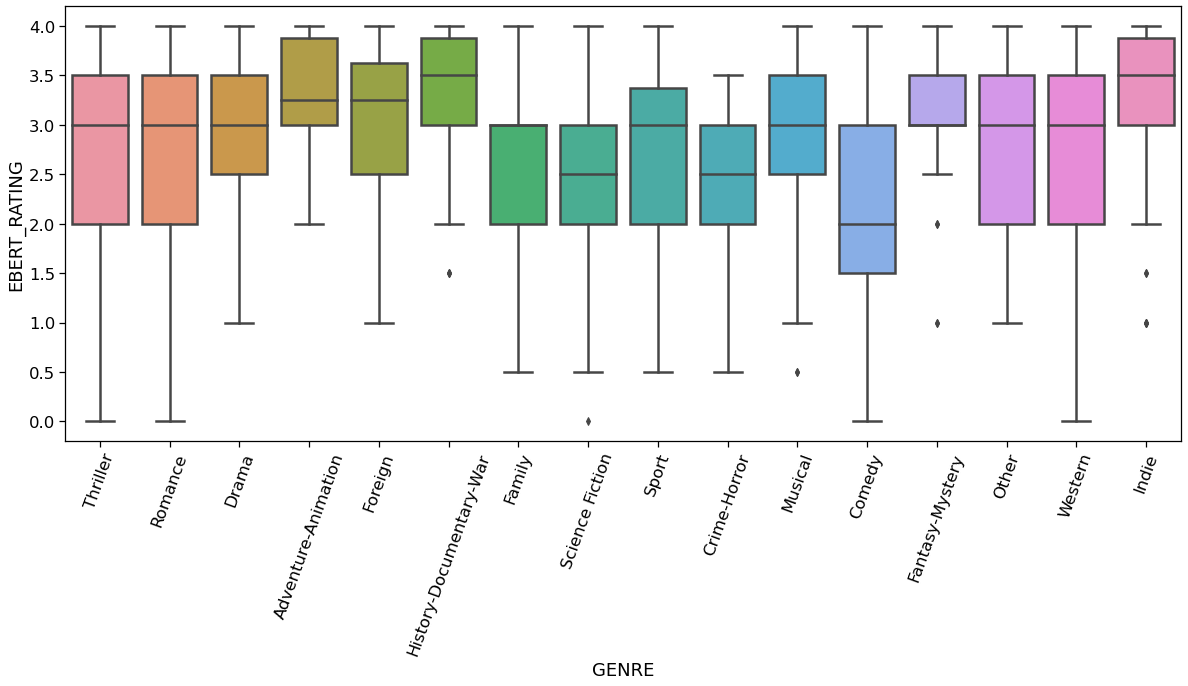

In [11]:
plt.figure(figsize=(20,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.boxplot(x="GENRE", y="EBERT_RATING", data=df)
plt.xticks(rotation=70);

## 2. Feature Engineering

In [12]:
# Proportion of opening week gross
df['OPEN_PROPORTION'] = df.OPENING_GROSS / df.WORLDWIDE_GROSS

# Proportion of domestic gross
df['DOMESTIC_PROPORTION'] = df.DOMESTIC_GROSS / df.WORLDWIDE_GROSS

Created dummy variables for categorical features - `Genre` and `mpaa rating`

In [13]:
genre_dummies = pd.get_dummies(df['GENRE'], prefix='GENRE', drop_first=True)
mpaa_dummies = pd.get_dummies(df['MPAA'], prefix='MPAA', drop_first=True)

df = df.join(genre_dummies).join(mpaa_dummies)
df.drop(['TITLE', 'GENRE', 'SUB_GENRE', 'MPAA'], inplace=True, axis=1)
df.head()

,YEAR,EBERT_RATING,RUNTIME,MOVIELENS_RATING,IMDB_RATING,BUDGET,OPENING_GROSS,DOMESTIC_GROSS,WORLDWIDE_GROSS,OPEN_PROPORTION,...,GENRE_Romance,GENRE_Science Fiction,GENRE_Sport,GENRE_Thriller,GENRE_Western,MPAA_NC-17,MPAA_NR,MPAA_PG,MPAA_PG-13,MPAA_R
0,2013,3.5,106,3.642730,7.1,30000000,9303145,32172757,63414135,0.146705,...,0,0,0,1,0,0,0,0,0,1
1,2012,2.5,98,3.451807,6.8,11000000,47122,18390117,59520298,0.000792,...,1,0,0,0,0,0,0,0,1,0
2,2012,2.0,106,2.939024,5.7,35000000,5750288,13103272,30962335,0.185719,...,1,0,0,0,0,0,0,0,1,0
3,1982,4.0,105,3.825658,7.8,2600000,11623,8144,8144,1.427186,...,0,0,0,0,0,0,0,0,0,1
4,2012,2.0,104,3.225352,6.2,15000000,6812900,15026056,37930465,0.179616,...,0,0,0,1,0,0,0,0,0,1


In [14]:
df.columns

Index(['YEAR', 'EBERT_RATING', 'RUNTIME', 'MOVIELENS_RATING', 'IMDB_RATING',
       'BUDGET', 'OPENING_GROSS', 'DOMESTIC_GROSS', 'WORLDWIDE_GROSS',
       'OPEN_PROPORTION', 'DOMESTIC_PROPORTION', 'GENRE_Comedy',
       'GENRE_Crime-Horror', 'GENRE_Drama', 'GENRE_Family',
       'GENRE_Fantasy-Mystery', 'GENRE_Foreign',
       'GENRE_History-Documentary-War', 'GENRE_Indie', 'GENRE_Musical',
       'GENRE_Other', 'GENRE_Romance', 'GENRE_Science Fiction', 'GENRE_Sport',
       'GENRE_Thriller', 'GENRE_Western', 'MPAA_NC-17', 'MPAA_NR', 'MPAA_PG',
       'MPAA_PG-13', 'MPAA_R'],
      dtype='object')

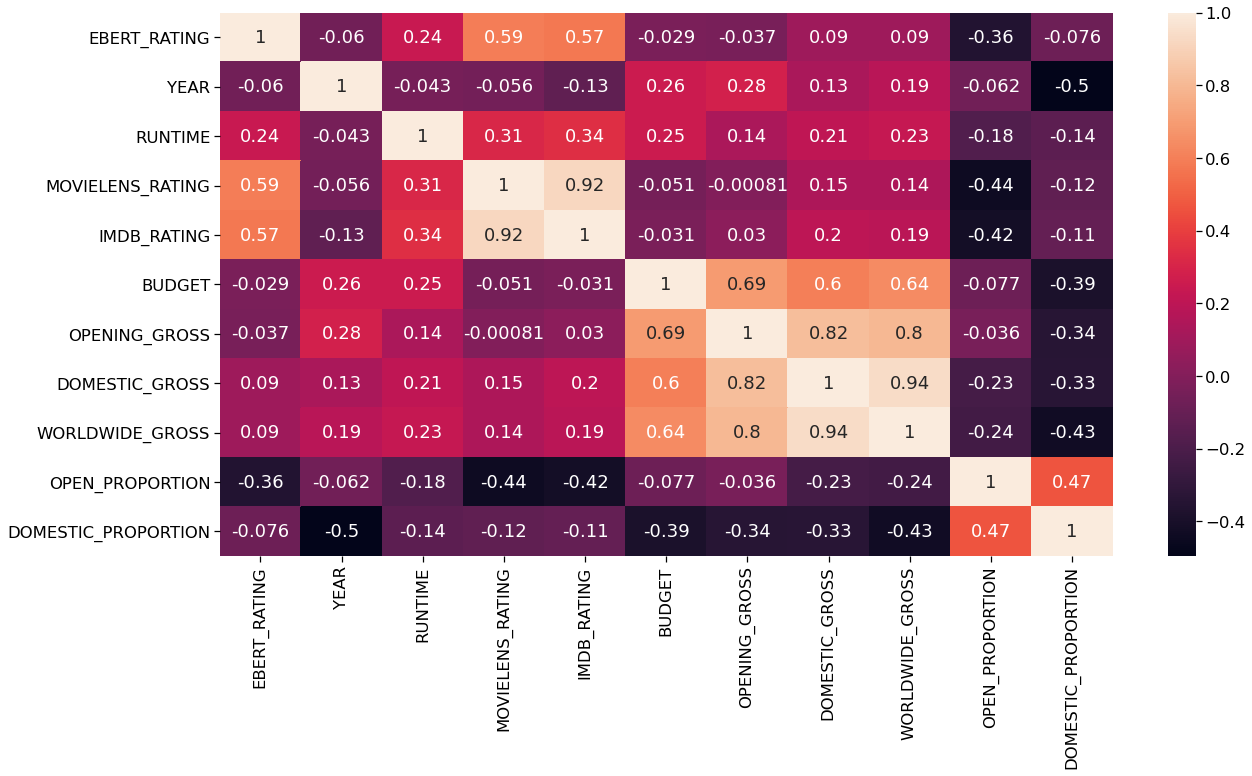

In [15]:
# Checking corr of numerical features in heatmap
smalldf = df.loc[:, ['EBERT_RATING','YEAR','RUNTIME','MOVIELENS_RATING', 'IMDB_RATING',
       'BUDGET', 'OPENING_GROSS', 'DOMESTIC_GROSS', 'WORLDWIDE_GROSS',
       'OPEN_PROPORTION', 'DOMESTIC_PROPORTION']]
plt.figure(figsize=[20,10])
sns.heatmap(smalldf.corr(),annot=True);

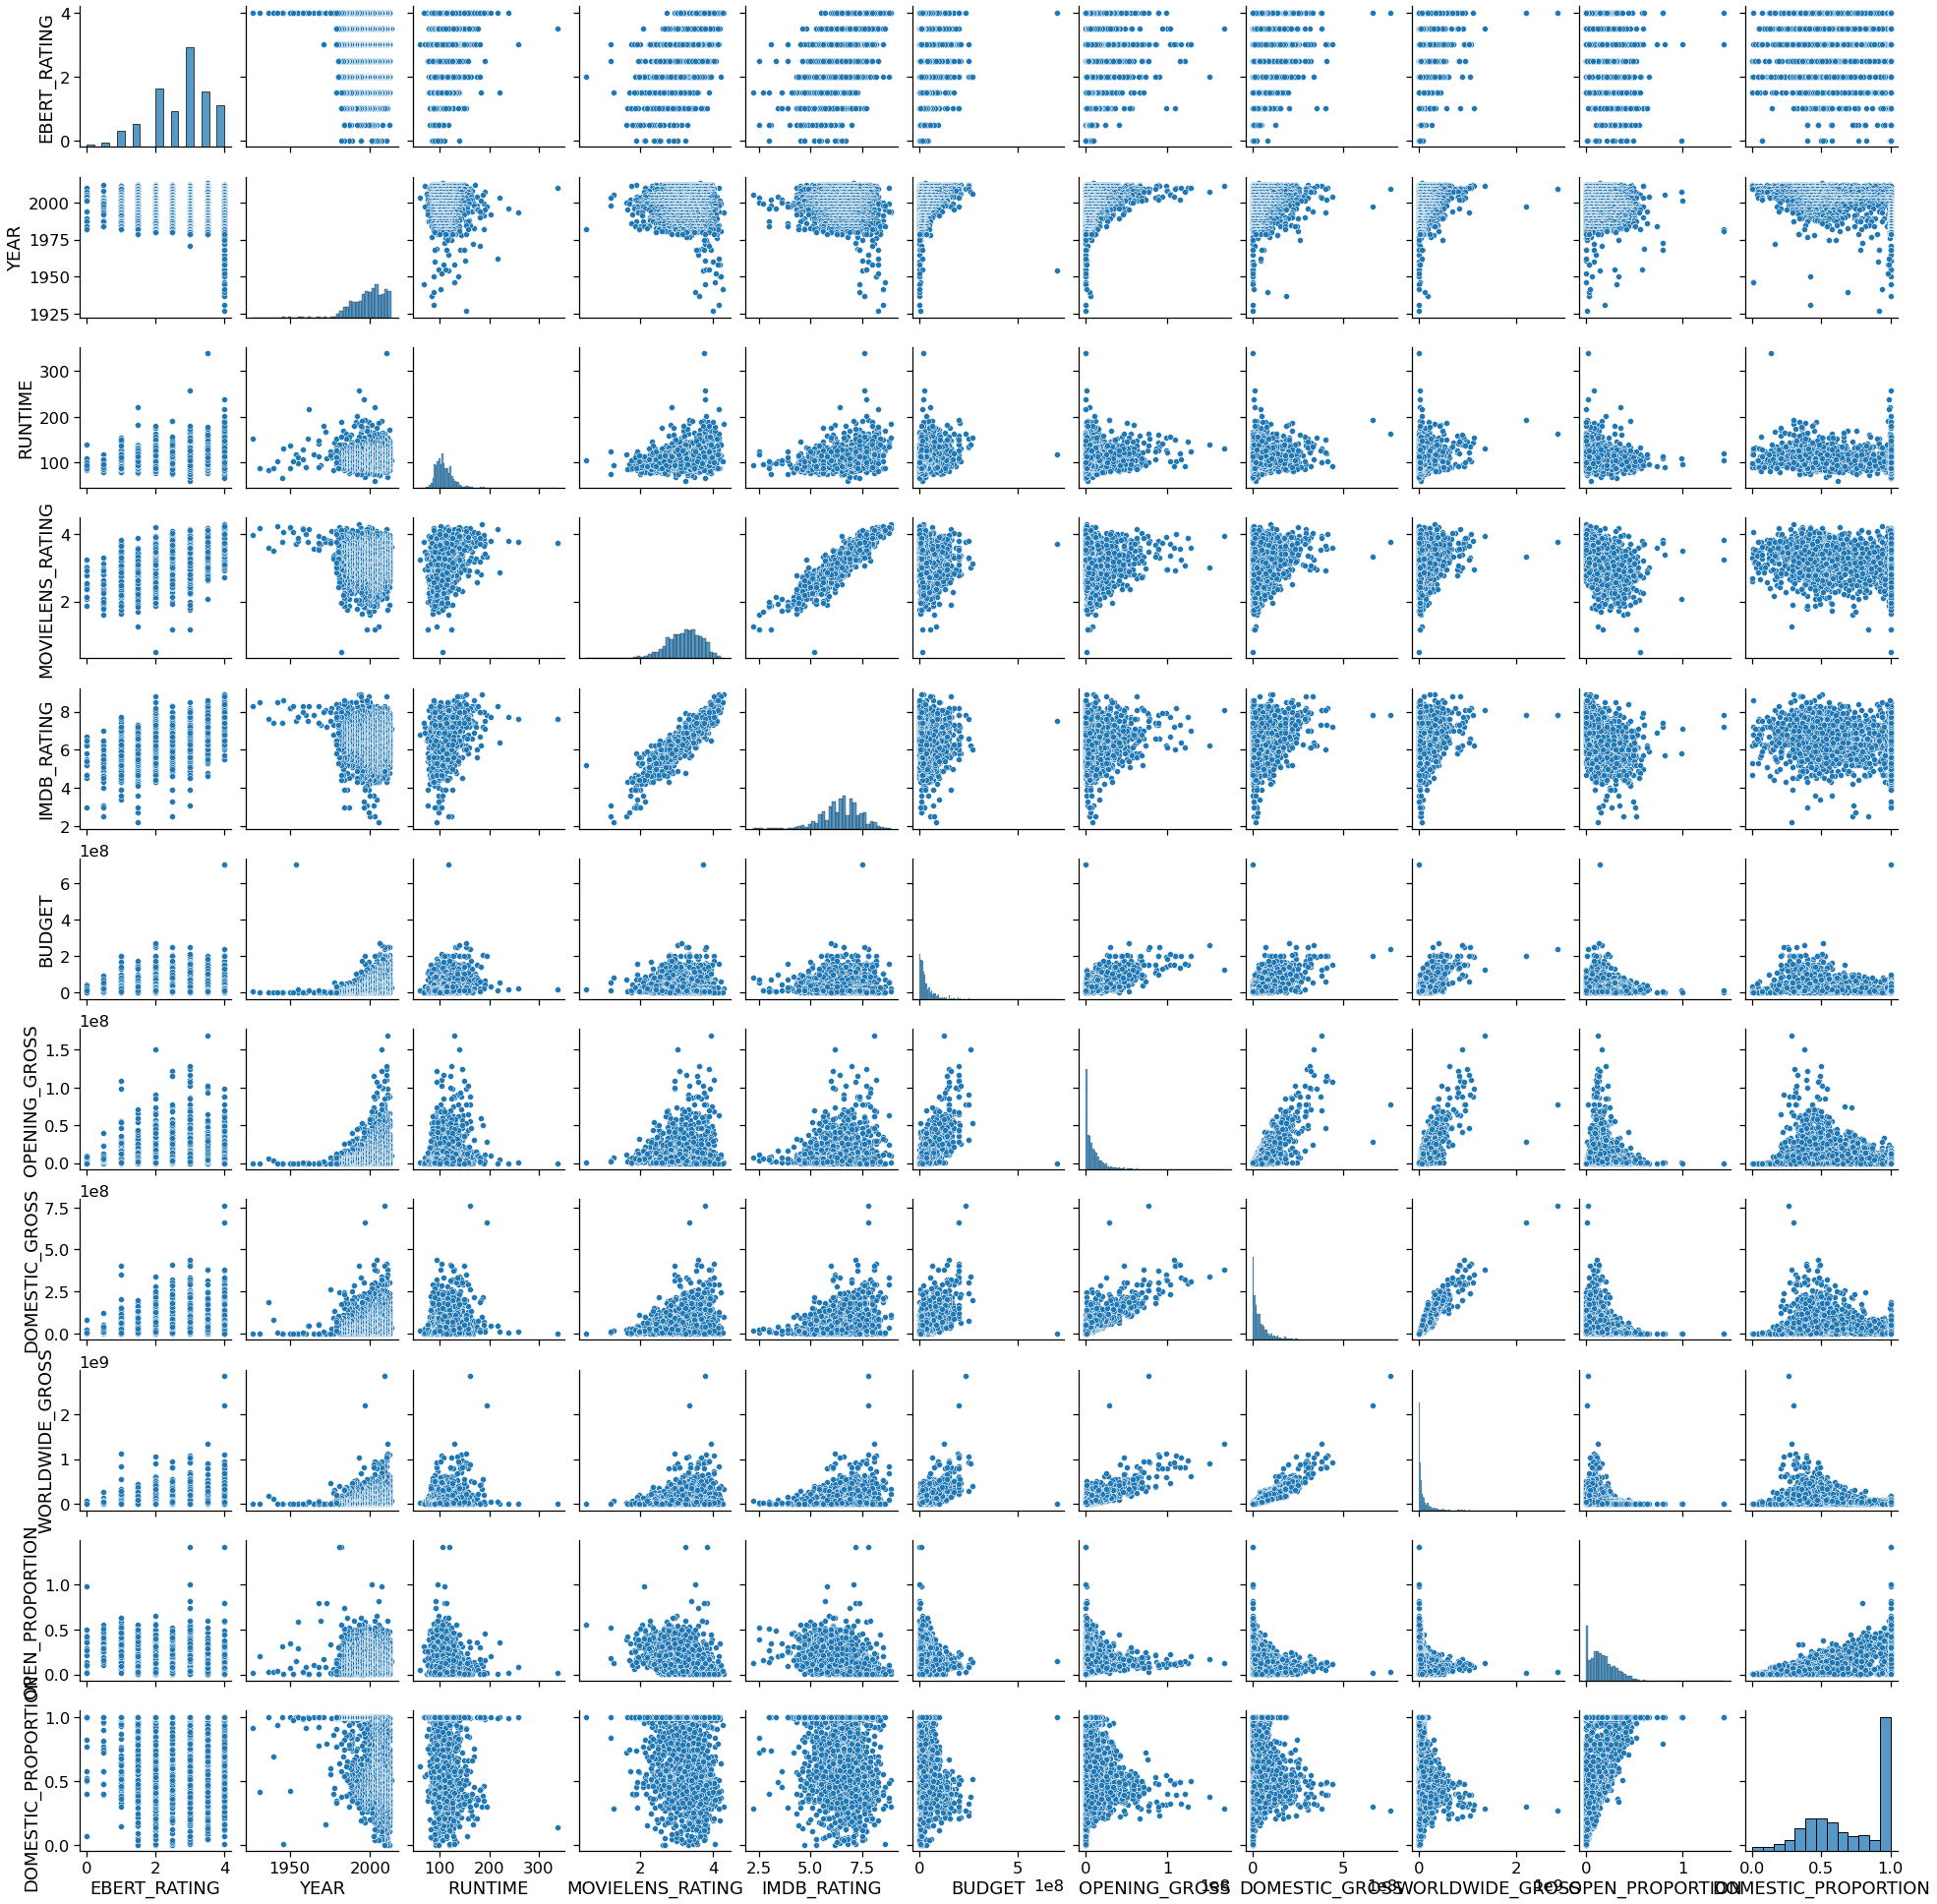

In [16]:
sns.pairplot(smalldf);

In [17]:
# Dropping features with high collinearity
df.drop(['BUDGET', 'OPENING_GROSS', 'DOMESTIC_GROSS', 'WORLDWIDE_GROSS','DOMESTIC_PROPORTION'], inplace=True, axis=1)

In [18]:
# Checking the top 15 + correlation 
df.corr()['EBERT_RATING'].sort_values(ascending=False)[:15]

EBERT_RATING                     1.000000
MOVIELENS_RATING                 0.592743
IMDB_RATING                      0.574228
RUNTIME                          0.244737
GENRE_History-Documentary-War    0.110710
GENRE_Indie                      0.096664
MPAA_R                           0.089282
GENRE_Drama                      0.078999
MPAA_NR                          0.078925
GENRE_Foreign                    0.045867
GENRE_Fantasy-Mystery            0.030915
MPAA_NC-17                       0.020979
GENRE_Musical                    0.011892
GENRE_Sport                      0.005226
GENRE_Romance                   -0.003247
Name: EBERT_RATING, dtype: float64

In [19]:
# top 15 - correlation
df.corr()['EBERT_RATING'].sort_values()[:15]

OPEN_PROPORTION         -0.357860
GENRE_Comedy            -0.147666
MPAA_PG-13              -0.110950
GENRE_Science Fiction   -0.069142
GENRE_Crime-Horror      -0.060948
YEAR                    -0.059881
MPAA_PG                 -0.048543
GENRE_Family            -0.021422
GENRE_Western           -0.017356
GENRE_Other             -0.010010
GENRE_Thriller          -0.008274
GENRE_Romance           -0.003247
GENRE_Sport              0.005226
GENRE_Musical            0.011892
MPAA_NC-17               0.020979
Name: EBERT_RATING, dtype: float64

In [20]:
# Checking for out of proportion value
df[df.OPEN_PROPORTION > 1]

,YEAR,EBERT_RATING,RUNTIME,MOVIELENS_RATING,IMDB_RATING,OPEN_PROPORTION,GENRE_Comedy,GENRE_Crime-Horror,GENRE_Drama,GENRE_Family,...,GENRE_Romance,GENRE_Science Fiction,GENRE_Sport,GENRE_Thriller,GENRE_Western,MPAA_NC-17,MPAA_NR,MPAA_PG,MPAA_PG-13,MPAA_R
3,1982,4.0,105,3.825658,7.8,1.427186,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2164,1981,3.0,120,3.250000,7.2,1.427186,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Drop those 2 rows
df2 = df[df.OPEN_PROPORTION <= 1]

In [22]:
print(df.shape)
print(df2.shape)

(2191, 26)
(2189, 26)


In [23]:
# save as pickle
df2.to_pickle('./data/final_df.pickle')